# Pytorch quy trinh làm việc

# Package

In [1]:
import torch 

# Dữ liệu (data)

In [2]:
weight = 0.4
bias = 0.6
x = torch.arange(1, 4, 1).unsqueeze(1)
y = weight * x  + bias
x, y


(tensor([[1],
         [2],
         [3]]),
 tensor([[1.0000],
         [1.4000],
         [1.8000]]))

# Phân chia dữ liệu để training và testing

In [3]:
weight = 0.4
bias = 0.6
x = torch.arange(0, 1, 0.02).unsqueeze(1)
y = weight * x  + bias
x, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.6000],
         [0.6080],
         [

In [4]:
split_train = int(0.8 * len(x))
train_x, test_x, train_y , test_y = x[:split_train], x[split_train:], y[:split_train], y[split_train:]

len(train_x), len(train_y), len(test_x), len(test_x)
predictions = weight * test_x + bias

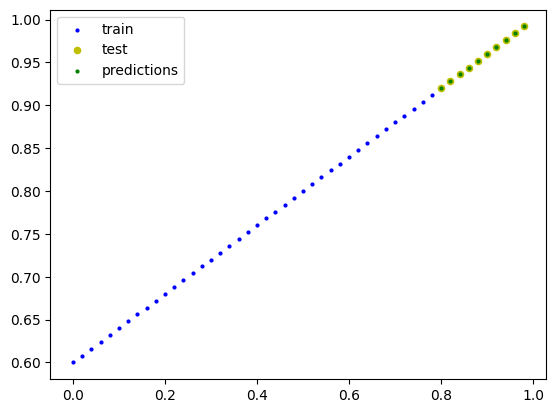

In [5]:
import matplotlib.pyplot as plt

def plot_predict(data_x=train_x, data_y=train_y, data_test_x=test_x, data_test_y=test_y, predictions=None):
    
    plt.scatter(data_x, data_y, c="b", s=4, label="train")
    plt.scatter(data_test_x, data_test_y, c="y", s=20, label="test")
    if predictions is not None:
        plt.scatter(data_test_x, predictions, s=4, c="g", label="predictions")
        
    plt.legend()
    plt.show()

plot_predict(predictions=predictions)
    

# Xây Dựng model 

In [6]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.weight = torch.nn.Parameter(torch.randn(1, 
                                                     dtype=torch.float32), 
                                         requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1, 
                                                   dtype=torch.float32),
                                       requires_grad=True)
        
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
        
        

# Điều cần thiết khi xậy dựng mô hình Pytorch

In [7]:
# torch.nn
# torch.nn.Parameter()
# torch.autograd()
# torch.nn.Module()
# torch.optim()

# Kiểm tra nội dung của model Pytorch

In [8]:
torch.manual_seed(42)

linear = LinearRegression()

print(list(linear.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [9]:
linear.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Tạo dự đoán với torch.inference_mode()

In [10]:
with torch.inference_mode():
    y_preds = linear(test_x)

In [11]:
print(f"Number of testing samples: {len(test_x)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


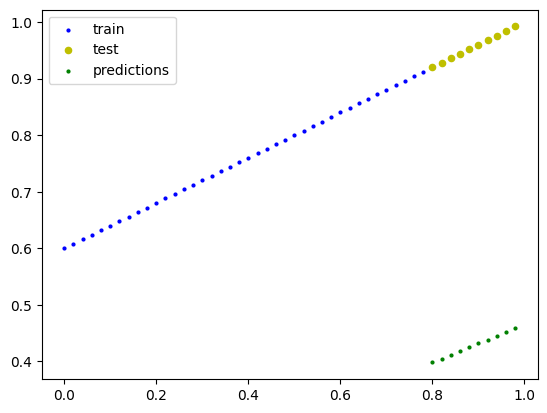

In [12]:
plot_predict(predictions=y_preds)

In [13]:
test_y - y_preds

tensor([[0.5218],
        [0.5231],
        [0.5244],
        [0.5256],
        [0.5269],
        [0.5282],
        [0.5294],
        [0.5307],
        [0.5320],
        [0.5332]])

# Training Model

In [14]:
### SuZeAI

# Tạo Hàm mất mát (loss) và tối ưu (optimize) trong pytorch

In [15]:
loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=linear.parameters(), lr=0.01)
print(loss)
print(optimizer)

L1Loss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


# Tạo vòng lặp tối ưu hóa trong Pytorch

In [ ]:
### SuZeAI